[![Notebook Tutorial](__code/__all/notebook_tutorial.png)](https://neutronimaging.pages.ornl.gov/en/tutorial/notebooks/panoramic_stitching)

<img src='__docs/__all/notebook_rules.png' />

# Select Your IPTS

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from __code.ui_builder import UiBuilder
o_builder = UiBuilder(ui_name = 'ui_panoramic_stitching.ui')

from __code.panoramic_stitching import Interface, InterfaceHandler

from __code import system
system.System.select_working_dir()
from __code.__all import custom_style
custom_style.style()

In [ ]:
%gui qt

# Select Images

In [ ]:
o_template = InterfaceHandler(working_dir=system.System.get_working_dir())
o_template.select_images(instruction='Select tiff or Fits Images ...')

# Display Images

In [ ]:
o_template.load()
o_interface = Interface(o_norm=o_template.o_norm)
o_interface.show()

# FOR DEBUGGING

In [1]:
from __code.ui_builder import UiBuilder
o_builder = UiBuilder(ui_name = 'ui_panoramic_stitching.ui')

import glob
from NeuNorm.normalization import Normalization
from __code.panoramic_stitching import Interface, InterfaceHandler

IPTS_folder = '/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-21632-Ed-Jeff-Katie/'
#IPTS_folder = '/Users/j35/IPTS/IPTS-21632/'

list_of_images = glob.glob(IPTS_folder + "4_images_to_stitch/*.tiff")
list_of_images.sort()
list_of_images = list_of_images[0:2]
configuration = IPTS_folder + 'roi.txt'
o_norm = Normalization()
o_norm.load(file=list_of_images, notebook=True)

from __code import system
# system.System.select_working_dir()

o_template = InterfaceHandler()
o_template.o_norm = o_norm

pyuic5 /Volumes/my_book_thunderbolt_duo/git/IPTS/python_notebooks/ui/ui_panoramic_stitching.ui -o /Volumes/my_book_thunderbolt_duo/git/IPTS/python_notebooks/__code/ui_panoramic_stitching.py


In [2]:
%gui qt

In [3]:
o_interface = Interface(o_norm=o_template.o_norm, configuration=configuration)
o_interface.show()

Leaving Panoramic Stitching UI


In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

In [5]:
counts_3d = o_interface.debug_counts_3d

AttributeError: 'Interface' object has no attribute 'debug_counts_3d'

In [ ]:
fig = plt.figure()
ax = plt.imshow(counts_3d)
plt.colorbar(ax)

In [7]:
data_reference = o_interface.list_reference['data'][0]
ref_x0 = 1719; ref_y0=147; ref_width=196; ref_height=239
data_reference_of_roi = data_reference[ref_y0:ref_y0+ref_height, ref_x0:ref_x0+ref_width]

<IPython.core.display.Javascript object>


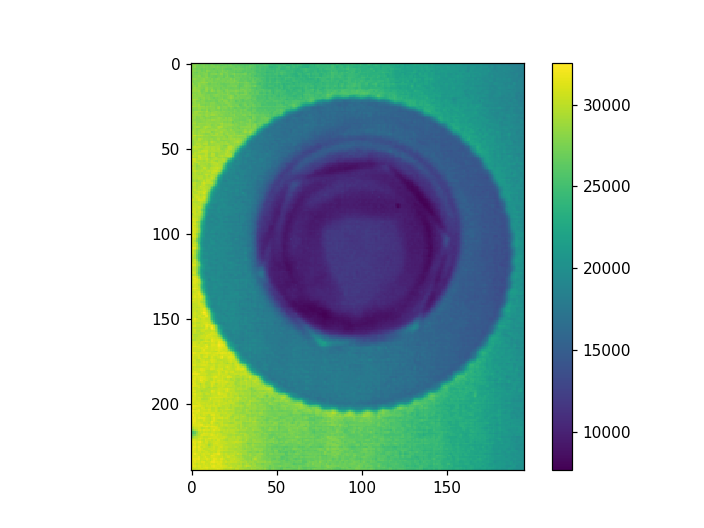

In [8]:
fig = plt.figure(2)
ax = plt.imshow(data_reference_of_roi)
plt.colorbar(ax)